#                                     Few-shot learning by Siamese network
https://sorenbouma.github.io/blog/oneshot/
https://towardsdatascience.com/one-shot-learning-with-siamese-networks-using-keras-17f34e75bb3d



## 1 N-Shot Learning


### 1.1 Definition

N-shot learning indicates N examples for each category (i.e., class) for training. 

In the N-shot learning, we have n labeled examples of each K classes, i.e. N∗K total examples which we call support set S . We also have to classify Query Set Q, where each example lies in one of the K classes. 


### 1.2 N-Shot Learning Categories

N-Shot Learning has three major sub-fields: zero-shot learning, one-shot learning, and few-shot learning.

- In "few-shot learning", "few" examples (e.g., between 0 and 5) for each class for traning.

- In "one-shot learning", "one" example for each class for training.

- In "zero-shot learning", "zero" example for each class for training.

All of these variants are trying to solve the same problem of learning with less data.


### 1.3 Why N-Shot Learning

- Typical deep learning architecture relies on sufficient training data, e.g., millions samples in ImageNets.  If the network is trained only on the above 4 classes of images (cats, dogs, horses and elephants), then we cannot expect to test it on any other class, example “zebra”. If we want our model to classify the images of zebra as well, then we need to first get a lot of zebra images and then we must re-train the model again.

- Data is scare in some fields, such as meidical imaging, drug discovery, and other domains.


### 1.4 How to conudct N-Shot Learning

Many of N-Shot Learning algorithms are combined with typical deep learning algorithms to produce remarkable results, e.g.,  Siamese network, Prototypical networks, and so on.




## 2 Case study: Introduction and Problem of Omniglot data set 

The Omniglot dataset includes 1623 hand-drawn characters from 50 different alphabets. For every character there are just 20 examples, each hand-drawn by a different person at resolution 105 x 105. That is, the sample size is 1623 * 20 = 32640 and each gray scale image of 32640 is represented by 105 x 105.

Note that, in case of English the set A to Z is called as the alphabet while each of the letter A, B, etc. is called a character. Thus we say that the English alphabet contains 26 characters (or letters). For example, "word" is an alphabet and "D" is a character.


In contrast to MNIST including 70K samples for only 10 digits (classes), Omniglot hae 1623 classes and 20 examples for each class.


In our course, we only extract one sample for each character for the training.

### <font color = red>Question 1: Can we use shallow learning to conduct classification?</font>

<font color = blue>Obviously, we can use 1 nearest neighbor method to conduct classification. However, the classification accuracy is only about 20%</font>


###  <font color = red>Question 2: Can we use deep learning models to conduct classification?</font>

<font color = blue>Of course, you can do. Howver,  it will severely overfit</font>

CNN has millions of parameters to adjust and so it can learn a huge space of possible functions. (More formally, they have a high VC dimension, which is part of why they do so well at learning from complex data with high dimensionality.)


### <font color = red>Question 3: Can we use fine-tuning such as CNN to conduct classification?</font>

Deep learning is good at learning features on the large amount of data points.

How about fine-tuning model? 

Good news: works quite a lot better than L2 distance nearest neighbour. It will be better if overcoming the issue of curse of dimensionality on the L2 distance.

Bas news:  doesn’t work too well due to the issue of overfitting on small number of data points.


## <font color = red>Solutions for two issues, i.e., the curse of dimensionality (i.e., metric learning to learn similarity function), overfitting (i.e., generate data points) </font>
![Siamese Networks](https://sorenbouma.github.io/images/Siamese_diagram_2.png)

Siamese Networks take two images as input and outputs the probability they share the same class.
Two networks should have the same weights. Otherwise, we can cancatenate two images into one image to learn a network.
The output is squashed into [0,1] with a sigmoid function to make it a probability. We use the target t=1 when the images have the same class and t=0 for a different class.



Instead of directly classifying an input (test) image to one of the 10 people in the organization, this network instead takes an extra reference image in the training images with the test image as input and will produce a similarity score denoting the chances that the two input images belong to the same person. Typically the similarity score is squished between 0 and 1 using a sigmoid function; wherein 0 denotes no similarity and 1 denotes full similarity. Any number between 0 and 1 is interpreted accordingly.

Notice that this network is not learning to classify an image directly to any of the output classes. Rather, it is learning a similarity function, which takes two images as input and expresses how similar they are.

![Siamese Networks](https://miro.medium.com/max/1400/1*g-561DsAfbU6gcVEk9AC4g.jpeg)

### The advantages of Siamese Networks
- train this network, we do not require too many instances of a class and only few are enough to build a good model.

- if we have a new test image A and want the network to detect this image, we only regard it as the reference image to be stored in the database. The network will then calculate the similarity for other new test image B. Thus we say that network predicts the score in one shot.

You can download the dataset by cloning this GitHub repository (https://github.com/brendenlake/omniglot). The folder named “Python” contains two zip files: images_background.zip and images_evaluation.zip. Just unzip these two files.

images_background folder contains characters from 30 alphabets and will be used to train the model, while images_evaluation folder contains characters from the other 20 alphabets which we will use to test our system.

Once you unzip the files, you will see below folders (alphabets) in the images_background folder(used for training purpose):


<table align='left'>
<tr>
<td><img src='https://miro.medium.com/max/556/1*RlaIu4FZ6uczRGFhEx50_A.jpeg'/></td>
<td><img src='https://miro.medium.com/max/209/1*cASkYmQo2id1MLx6V4pECg.jpeg'/></td>
</tr>
</table>



## Case study by mapping the problem of few-shot learning to binary classification task

<font color = red>Difference between MAML (or Reptile) and Siamese network</font>

- after obtaining $F^*$, MAML (or Reptile) combines $F^*$ with the support set to generate $f^*$, followed by predicting the query set.

- after obtaining $F^*$, Siamese network combines $F^*$ with the support set to directly predict the query set without explicitly generating $f^*$.





Given the data set (Xi, Yi), i= 1,...,n  where ‘Xi’ = pair of images,  Yi = 1  (if both images contain the same character) and 
Yi = 0 (if both images contain different characters).

![Siamese Networks](https://miro.medium.com/max/2000/1*4kfqL7aEvVMU0iALyxvG0g.png)


### 1). Data Preprocessing

We first need to obtain the Omniglot data set and then create pairs of images along with the target variable, as shown above, to be fed as input to the Siamese Network (Please see get_batch(batch_size,s="train")).

Note that even though characters from Sanskrit alphabet are shown above, but in practice we will generate pairs randomly from all the alphabets in the training data.



### 2). Model Architecture: Define Siamese Networks 

Build the Siamese networks and then complie it.


### 3). Model Validation or Model Fitting or Training

Fit the one-shot learning model with data.


### 4). Test


### 1). Data Preprocessing

In [1]:
## Import functions/modules/libraries

import sys
import numpy as np
import pandas as pd
from imageio import imread
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng

Using TensorFlow backend.


In [2]:
### Please give below paths as per the paths in your system

train_folder = "omniglot/images_background/"
val_folder = "omniglot/images_evaluation/"
save_path = "omniglot/"
print(train_folder)

omniglot/images_background/


In [3]:
## load images

def loadimgs(path,n = 0):
    '''
    path => Path of train directory or test directory
    '''
    X=[]
    y = []
    cat_dict = {}
    lang_dict = {}
    curr_y = n
    # we load every alphabet seperately so we can isolate them later
    for alphabet in os.listdir(path):
        print("loading alphabet: " + alphabet)
        lang_dict[alphabet] = [curr_y,None]
        alphabet_path = os.path.join(path,alphabet)
        # every letter/category has it's own column in the array, so  load seperately
        for letter in os.listdir(alphabet_path):
            cat_dict[curr_y] = (alphabet, letter)
            category_images=[]
            letter_path = os.path.join(alphabet_path, letter)
            # read all the images in the current category
            for filename in os.listdir(letter_path):
                image_path = os.path.join(letter_path, filename)
                image = imread(image_path)
                category_images.append(image)
                y.append(curr_y)
            try:
                X.append(np.stack(category_images))
            # edge case  - last one
            except ValueError as e:
                print(e)
                print("error - category_images:", category_images)
            curr_y += 1
            lang_dict[alphabet][1] = curr_y - 1
    y = np.vstack(y)
    X = np.stack(X)
    return X,y,lang_dict



### Loading the train images into tensors

In [4]:
## call this function 
X,y,c = loadimgs(train_folder)

loading alphabet: Alphabet_of_the_Magi
loading alphabet: Anglo-Saxon_Futhorc
loading alphabet: Arcadian
loading alphabet: Armenian
loading alphabet: Asomtavruli_(Georgian)
loading alphabet: Balinese
loading alphabet: Bengali
loading alphabet: Blackfoot_(Canadian_Aboriginal_Syllabics)
loading alphabet: Braille
loading alphabet: Burmese_(Myanmar)
loading alphabet: Cyrillic
loading alphabet: Early_Aramaic
loading alphabet: Futurama
loading alphabet: Grantha
loading alphabet: Greek
loading alphabet: Gujarati
loading alphabet: Hebrew
loading alphabet: Inuktitut_(Canadian_Aboriginal_Syllabics)
loading alphabet: Japanese_(hiragana)
loading alphabet: Japanese_(katakana)
loading alphabet: Korean
loading alphabet: Latin
loading alphabet: Malay_(Jawi_-_Arabic)
loading alphabet: Mkhedruli_(Georgian)
loading alphabet: N_Ko
loading alphabet: Ojibwe_(Canadian_Aboriginal_Syllabics)
loading alphabet: Sanskrit
loading alphabet: Syriac_(Estrangelo)
loading alphabet: Tagalog
loading alphabet: Tifinagh


This means we have 964 characters (or letters or categories) spanning across 30 different alphabets. For each of this character, we have 20 images, and each image is a gray scale image of resolution 105x105. Hence the shape (964, 20, 105, 105).

Total number of images = 964 * 20 = 19280. All the images for one letter have the same label., i.e. The first 20 images have the label 0, the next 20 have the label 1, and so on, … the last 20 images have the label 963.

 ‘c’ stands for categories and it is a dictionary

In [5]:
X.shape
##(964, 20, 105, 105)

(964, 20, 105, 105)

In [6]:
y.shape
##(19280, 1)

(19280, 1)

In [7]:
c.keys() # 'c' for categories

dict_keys(['Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Arcadian', 'Armenian', 'Asomtavruli_(Georgian)', 'Balinese', 'Bengali', 'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Braille', 'Burmese_(Myanmar)', 'Cyrillic', 'Early_Aramaic', 'Futurama', 'Grantha', 'Greek', 'Gujarati', 'Hebrew', 'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'Japanese_(hiragana)', 'Japanese_(katakana)', 'Korean', 'Latin', 'Malay_(Jawi_-_Arabic)', 'Mkhedruli_(Georgian)', 'N_Ko', 'Ojibwe_(Canadian_Aboriginal_Syllabics)', 'Sanskrit', 'Syriac_(Estrangelo)', 'Tagalog', 'Tifinagh'])

In [8]:
c['Alphabet_of_the_Magi'] #[0, 19]

[0, 19]

In [9]:
c['Anglo-Saxon_Futhorc'] #[20, 48]

[20, 48]

Since there are 30 different alphabets, this dictionary ‘c’ contains 30 items. The key for each item is the name of the alphabet. The value for each item is a list of two numbers: [low, high], where ‘low’ (0) is the label of the first character in that alphabet and ‘high’ (19) is the label of the last character in that alphabet.

### Saving the train tensors on disk

Once we load the train and test images, we save the tensors on the disk in a pickle file, so that we can utilize them later directly without having to load the images again.

In [10]:
with open(os.path.join(save_path,"train.pickle"), "wb") as f:
    pickle.dump((X,c),f)

### Loading the validation images into tensors

In [11]:
Xval,yval,cval=loadimgs(val_folder)

loading alphabet: Angelic
loading alphabet: Atemayar_Qelisayer
loading alphabet: Atlantean
loading alphabet: Aurek-Besh
loading alphabet: Avesta
loading alphabet: Ge_ez
loading alphabet: Glagolitic
loading alphabet: Gurmukhi
loading alphabet: Kannada
loading alphabet: Keble
loading alphabet: Malayalam
loading alphabet: Manipuri
loading alphabet: Mongolian
loading alphabet: Old_Church_Slavonic_(Cyrillic)
loading alphabet: Oriya
loading alphabet: Sylheti
loading alphabet: Syriac_(Serto)
loading alphabet: Tengwar
loading alphabet: Tibetan
loading alphabet: ULOG


### Saving the validation tensors on disk

In [12]:
with open(os.path.join(save_path,"val.pickle"), "wb") as f:
    pickle.dump((Xval,cval),f)

### Loading the train tensors

In [13]:
with open(os.path.join(save_path, "train.pickle"), "rb") as f:
    (Xtrain, train_classes) = pickle.load(f)
    
print("Training alphabets: \n")
print(list(train_classes.keys()))

Training alphabets: 

['Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Arcadian', 'Armenian', 'Asomtavruli_(Georgian)', 'Balinese', 'Bengali', 'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Braille', 'Burmese_(Myanmar)', 'Cyrillic', 'Early_Aramaic', 'Futurama', 'Grantha', 'Greek', 'Gujarati', 'Hebrew', 'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'Japanese_(hiragana)', 'Japanese_(katakana)', 'Korean', 'Latin', 'Malay_(Jawi_-_Arabic)', 'Mkhedruli_(Georgian)', 'N_Ko', 'Ojibwe_(Canadian_Aboriginal_Syllabics)', 'Sanskrit', 'Syriac_(Estrangelo)', 'Tagalog', 'Tifinagh']


In [14]:
with open(os.path.join(save_path, "val.pickle"), "rb") as f:
    (Xval, val_classes) = pickle.load(f)

print("Validation alphabets:", end="\n\n")
print(list(val_classes.keys()))

Validation alphabets:

['Angelic', 'Atemayar_Qelisayer', 'Atlantean', 'Aurek-Besh', 'Avesta', 'Ge_ez', 'Glagolitic', 'Gurmukhi', 'Kannada', 'Keble', 'Malayalam', 'Manipuri', 'Mongolian', 'Old_Church_Slavonic_(Cyrillic)', 'Oriya', 'Sylheti', 'Syriac_(Serto)', 'Tengwar', 'Tibetan', 'ULOG']


In [15]:
def get_batch(batch_size,s="train"):
    """Create batch of n pairs, half same class, half different class"""
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape

    # randomly sample several classes to use in the batch
    categories = rng.choice(n_classes,size=(batch_size,),replace=False)
    
    # initialize 2 empty arrays for the input image batch
    pairs=[np.zeros((batch_size, h, w,1)) for i in range(2)]
    
    # initialize vector for the targets
    targets=np.zeros((batch_size,))
    
    # make one half of it '1's, so 2nd half of batch has same class
    targets[batch_size//2:] = 1
    for i in range(batch_size):
        category = categories[i]
        idx_1 = rng.randint(0, n_examples)
        pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 1)
        idx_2 = rng.randint(0, n_examples)
        
        # pick images of same class for 1st half, different for 2nd
        if i >= batch_size // 2:
            category_2 = category  
        else: 
            # add a random number to the category modulo n classes to ensure 2nd image has a different category
            category_2 = (category + rng.randint(1,n_classes)) % n_classes
        
        pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h,1)
    
    return pairs, targets

We need to call the above function by passing the batch_size and it will return “batch_size” number of image pairs along with their target variables.

We will use the below generator function to generate data in batches during the training of the network.

In [16]:
def generate(batch_size, s="train"):
    """a generator for batches, so model.fit_generator can be used. """
    while True:
        pairs, targets = get_batch(batch_size,s)
        yield (pairs, targets)

### 2).  Model Architecture: Define Siamese Networks 

![Siamese Networks](https://miro.medium.com/max/2000/1*dFY5gx-Vze3micJ0AMVp0A.jpeg)

- The term Siamese means twins. The two Convolutional Neural Networks shown above are not different networks but are two copies of the same network, hence the name Siamese Networks. Basically they share the same parameters. 

-- <font color = red>Why?</font>

-- <font color = red>How does the code of Siamese Networks guarantee to output the same parameters for two networks?</font>  

- The two input images (x1 and x2) are passed through the ConvNet to generate a fixed length feature vector for each (h(x1) and h(x2)). 

Assuming the neural network model is trained properly, we can make the following hypothesis: If the two input images belong to the same character (class), then their feature vectors must also be similar.

Otherwise, if the two input images belong to the different characters, then their feature vectors will also be different. Thus the element-wise absolute difference between the two feature vectors must be very different in both the above cases. And hence the similarity score generated by the output sigmoid layer must also be different in these two cases. This is the central idea behind the Siamese Networks.


Given the above intuition let’s look at the picture of the architecture with more finer details taken from the research paper itself


![Siamese Networks](https://miro.medium.com/max/3240/1*v40QXakPBOmiq4lCKbPu8w.png)

In [17]:
def initialize_weights(shape, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer weights with mean as 0.0 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

In [18]:
def initialize_bias(shape, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer bias with mean as 0.5 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

In [19]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # Convolutional Neural Network
    model = Sequential()
    model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape,
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    
    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)  ########### use the same parameters for two inputs ##################
    encoded_r = model(right_input) ########### use the same parameters for two inputs ##################
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))   ########### learning the similarity#################
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid',bias_initializer=initialize_bias)(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    # return the model
    return siamese_net

<font color = red>Notice that there is no predefined layer in Keras to compute the absolute difference between two tensors. We do this using the Lambda layer in Keras which is used to add customized layers in Keras.</font>

To understand the shape of the tensors passed at different layers, refer the below image generated using the plot_model utility of Keras.
![Siamese Networks](https://miro.medium.com/max/1400/1*RvqlZBlfOT9TcnEYhe_IQw.png)




In [20]:
model = get_siamese_model((105, 105, 1))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         38947648    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4096)         0           sequential_1[1][0]         

In [21]:
from IPython.display import Image
# Image(retina=True, filename='model.png')

In [22]:
optimizer = Adam(lr = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=optimizer)

### 3). Model Validation or Model Fitting or Training


Now that we have understood how to prepare the data for training, model architecture and training; it’s time we must think about a strategy to validate and test our model.


Note that, for every pair of input images, our model generates a similarity score between 0 and 1. But just looking at the score its difficult to ascertain whether the model is really able to recognize similar characters and distinguish dissimilar ones.

To solve the above issue, we use N-way one shot learning, where we have n pairs.


![Example of a 4-way one shot learning](https://miro.medium.com/max/1400/1*2VWymNAhUWX4h9sxmwzwSQ.jpeg)

Specifically, we compare each test image with 4 different classes to output 4 similarity score S1, S2, S3, and S4. Obviously, S1 should be with the largest value if it is correct prediction. Repeating this procedure ‘k’ times, we can calculate the percentage of correct predictions as follows:

percent_correct = (100 * n_correct) / k

where k indicates the total no. of trials and n_correct indicates the no. of correct predictions out of k trials.

It’s quite obvious that smaller values of ’N’ will lead to more correct predictions and larger values of ’N’ will lead to relatively less correct predictions when repeated multiple times.

Just a reminder again: in practice we  generate the test image and the support (or training) set randomly from all the alphabets of the test/validation dataset images.

###  3.1). Prepare test image and support images

In [23]:
def make_oneshot_task(N, s="val", language=None):
    """Create pairs of test image, support set for testing N way one-shot learning. """
    if s == 'train':
        X = Xtrain
        categories = train_classes
    else:
        X = Xval
        categories = val_classes
    n_classes, n_examples, w, h = X.shape
    
    indices = rng.randint(0, n_examples,size=(N,))
    if language is not None: # if language is specified, select characters for that language
        low, high = categories[language]
        if N > high - low:
            raise ValueError("This language ({}) has less than {} letters".format(language, N))
        categories = rng.choice(range(low,high),size=(N,),replace=False)

    else: # if no language specified just pick a bunch of random letters
        categories = rng.choice(range(n_classes),size=(N,),replace=False)            
    true_category = categories[0]
    ex1, ex2 = rng.choice(n_examples,replace=False,size=(2,))
    test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h,1)
    support_set = X[categories,indices,:,:]
    support_set[0,:,:] = X[true_category,ex2]
    support_set = support_set.reshape(N, w, h,1)
    targets = np.zeros((N,))
    targets[0] = 1
    targets, test_image, support_set = shuffle(targets, test_image, support_set)
    pairs = [test_image,support_set]

    return pairs, targets

###  3.2.) Model Validation or Model Fitting or Training

In [45]:
# Hyper parameters
evaluate_every = 200 # interval for evaluating on one-shot tasks
batch_size = 32
n_iter = 2000 # No. of training iterations
N_way = 20 # how many classes for testing one-shot tasks
n_val = 250 # how many one-shot tasks to validate on
best = -1

In [46]:
model_path = 'omniglot/weights/'

In [47]:
def test_oneshot(model, N, k, s = "val", verbose = 0):
    """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    n_correct = 0
    if verbose:
        print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
    for i in range(k):
        inputs, targets = make_oneshot_task(N,s)
        probs = model.predict(inputs)
        if np.argmax(probs) == np.argmax(targets):
            n_correct+=1
    percent_correct = (100.0 * n_correct / k)
    if verbose:
        print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    return percent_correct

In [48]:
print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(1, n_iter+1):
    (inputs,targets) = get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)    ###
    if i % evaluate_every == 0:
        print("\n ------------- \n")
        print("Time for {0} iterations: {1} mins".format(i, (time.time()-t_start)/60.0))
        print("Train Loss: {0}".format(loss)) 
        val_acc = test_oneshot(model, N_way, n_val, verbose=True)
#         model.save_weights(os.path.join(model_path, 'weights.{}.h5'.format(i)))
        if val_acc >= best:
            print("Current best: {0}, previous best: {1}".format(val_acc, best))
            best = val_acc

Starting training process!
-------------------------------------

 ------------- 

Time for 200 iterations: 5.699273629983266 mins
Train Loss: 0.3251250386238098
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 74.4% 20 way one-shot learning accuracy 

Current best: 74.4, previous best: -1

 ------------- 

Time for 400 iterations: 12.022500626246135 mins
Train Loss: 0.32706788182258606
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 75.6% 20 way one-shot learning accuracy 

Current best: 75.6, previous best: 74.4

 ------------- 

Time for 600 iterations: 18.386661287148794 mins
Train Loss: 0.32897746562957764
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an average of 72.8% 20 way one-shot learning accuracy 


 ------------- 

Time for 800 iterations: 24.647207550207774 mins
Train Loss: 0.3147948384284973
Evaluating model on 250 random 20 way one-shot learning tasks ... 

Got an avera

###  4). Test 

###  4). Test 

### Visualizing test image and the images in the support set

In [30]:
def concat_images(X):
    """Concatenates a bunch of images into a big matrix for plotting purposes."""
    nc, h , w, _ = X.shape
    X = X.reshape(nc, h, w)
    n = np.ceil(np.sqrt(nc)).astype("int8")
    img = np.zeros((n*w,n*h))
    x = 0
    y = 0
    for example in range(nc):
        img[x*w:(x+1)*w,y*h:(y+1)*h] = X[example]
        y += 1
        if y >= n:
            y = 0
            x += 1
    return img

In [31]:
def plot_oneshot_task(pairs):
    fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.matshow(pairs[0][0].reshape(105,105), cmap='gray')
    img = concat_images(pairs[1])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax2.matshow(img,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

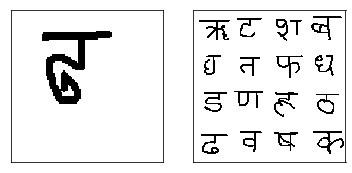

In [32]:
# Example of concat image visualization
pairs, targets = make_oneshot_task(16,"train","Sanskrit")
plot_oneshot_task(pairs)

## Base Line 1 — Nearest Neighbor Model

In N-way one shot learning, we compare a test image with N different images and select that image which has highest similarity with the test image as the prediction. This is intuitively similar to the KNN with K=1 with the fixed similarity function L2 distance, whehre N-way one shot learning learns the similarity function.

![L2 distance between two vectors](https://miro.medium.com/max/1400/1*HHCG84Re2avw6_rDYGFtrg.jpeg)

<font color = red>Problem: the input image is represeted by a matrix</font>

- The solution is to flatten the matrix into a vector.



![Computing L2 distance between images](https://miro.medium.com/max/2000/1*ibo02Yz9oTfOHeAG34faTg.jpeg)


Similar to N way one shot learning, we repeat this for multiple trials and compute the average prediction score over all the trials. The code for nearest neighbor approach is below:



In [33]:
def nearest_neighbour_correct(pairs,targets):
    """returns 1 if nearest neighbour gets the correct answer for a one-shot task  given by (pairs, targets)"""
    L2_distances = np.zeros_like(targets)
    for i in range(len(targets)):
        L2_distances[i] = np.sum(np.sqrt(pairs[0][i]**2 - pairs[1][i]**2))
    if np.argmin(L2_distances) == np.argmax(targets):
        return 1
    return 0

In [34]:
def test_nn_accuracy(N_ways,n_trials):
    """Returns accuracy of NN approach """
    print("Evaluating nearest neighbour on {} unique {} way one-shot learning tasks ...".format(n_trials,N_ways))

    n_right = 0
    
    for i in range(n_trials):
        pairs,targets = make_oneshot_task(N_ways,"val")
        correct = nearest_neighbour_correct(pairs,targets)
        n_right += correct
    return 100.0 * n_right / n_trials

In [35]:
ways = np.arange(1,20,2)
resume =  False
trials = 50

In [36]:
val_accs, train_accs,nn_accs = [], [], []
for N in ways:    
    val_accs.append(test_oneshot(model, N, trials, "val", verbose=True))
    train_accs.append(test_oneshot(model, N, trials, "train", verbose=True))
    nn_acc = test_nn_accuracy(N, trials)
    nn_accs.append(nn_acc)
    print ("NN Accuracy = ", nn_acc)
    print("---------------------------------------------------------------------------------------------------------------")

Evaluating model on 50 random 1 way one-shot learning tasks ... 

Got an average of 100.0% 1 way one-shot learning accuracy 

Evaluating model on 50 random 1 way one-shot learning tasks ... 

Got an average of 100.0% 1 way one-shot learning accuracy 

Evaluating nearest neighbour on 50 unique 1 way one-shot learning tasks ...
NN Accuracy =  100.0
---------------------------------------------------------------------------------------------------------------
Evaluating model on 50 random 3 way one-shot learning tasks ... 

Got an average of 98.0% 3 way one-shot learning accuracy 

Evaluating model on 50 random 3 way one-shot learning tasks ... 

Got an average of 88.0% 3 way one-shot learning accuracy 

Evaluating nearest neighbour on 50 unique 3 way one-shot learning tasks ...
NN Accuracy =  56.0
---------------------------------------------------------------------------------------------------------------
Evaluating model on 50 random 5 way one-shot learning tasks ... 

Got an average 

### Save the accuracies on disk

In [37]:
with open(os.path.join(save_path,"accuracies.pickle"), "wb") as f:
    pickle.dump((val_accs,train_accs,nn_accs),f)

### Load the accuracies from disk

In [38]:
with open(os.path.join(save_path, "accuracies.pickle"), "rb") as f:
    (val_accs, train_accs, nn_accs) = pickle.load(f)

## Base Line 2 — Random Model

Creating a random model which makes prediction at random is a very common technique to make sure that the model we created is at least better than a model which makes completely random predictions. It’s working can be summarized in the below diagram:

![N-way Random Approach](https://miro.medium.com/max/1400/1*LLIQUSW8qnvZE-cY_arlFg.jpeg)

## Compared the train result and validation result, with two Baline methods


![N-way Random Approach](https://miro.medium.com/max/1254/1*VAL2TmGC8bWwiWzUDrIlEw.jpeg)


Clearly the Siamese Model performed much better than the Random Model and the Nearest Neighbor Model. However there is some gap between the results on training set and validation set which indicate that model is over fitting.



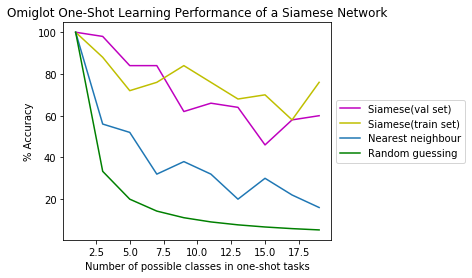

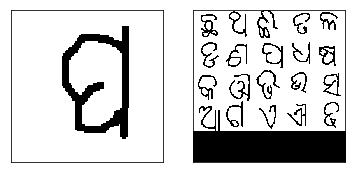

In [39]:
fig,ax = plt.subplots(1)
ax.plot(ways, val_accs, "m", label="Siamese(val set)")
ax.plot(ways, train_accs, "y", label="Siamese(train set)")
plt.plot(ways, nn_accs, label="Nearest neighbour")
ax.plot(ways, 100.0/ways, "g", label="Random guessing")

plt.xlabel("Number of possible classes in one-shot tasks")
plt.ylabel("% Accuracy")
plt.title("Omiglot One-Shot Learning Performance of a Siamese Network")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
inputs,targets = make_oneshot_task(20, "val", 'Oriya')
plt.show()

plot_oneshot_task(inputs)